# Multi Class Classification Using Neutral Network

![Neural Network Architecture](./images/neural_net.png)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mat4py import loadmat
import time
np.set_printoptions(suppress=True)

In [73]:
data = loadmat('./data/ex3data1.mat')
weights = loadmat('./data/ex3weights.mat')

X = np.array(data['X'])
y = np.array(data['y'])
# replace 10 with 0
# y[y==10] = 0

Theta1 = np.array(weights['Theta1'])
Theta2 = np.array(weights['Theta2'])

In [74]:
# input 400
# hidden layer 25
# output layer 10

X.shape, y.shape, Theta1.shape, Theta2.shape

((5000, 400), (5000, 1), (25, 401), (10, 26))

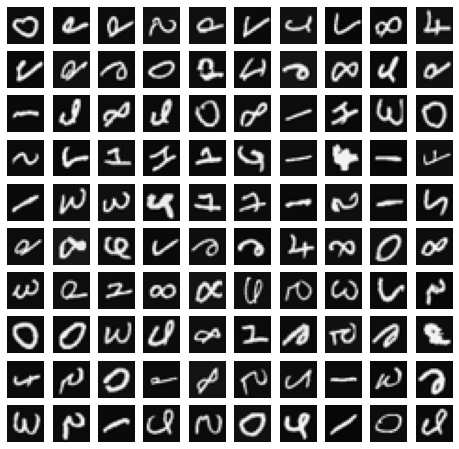

In [35]:
nums = np.random.choice(X.shape[0], size=100, replace=False)
images = X[nums, :]

fig, axes = plt.subplots(10,10, figsize=(8,8))

for i,ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(20,20), cmap='gray')
    ax.axis("off")   # turns off axes

In [62]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def addIntercept(X):
    return np.column_stack((np.ones(X.shape[0]), X))

In [75]:
a_1 = addIntercept(X)

z_2 = np.dot(a_1, Theta1.T)

a_2 = sigmoid(z_2)

a_2 = addIntercept(a_2)

z_3 = np.dot(a_2, Theta2.T)

a_3 = sigmoid(z_3)

In [76]:
# a_3.shape
# prediction
pred = a_3.argmax(axis=1) + 1

pred.shape

(5000,)

In [78]:
c = 0
for i in range(5000):
    if(y[i] == pred[i]):
        c += 1
        
print(c)

4876


Actual Value: [9] Predicted: 9


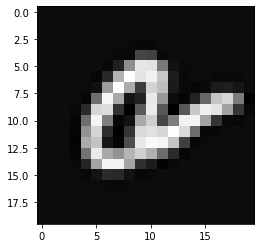

q


In [79]:
from IPython.display import clear_output

in_key = ''

while in_key != 'q':
    clear_output(wait=True)
    
    val = np.random.randint(low=0, high=5000, size=1)[0]
    
    print(f'Actual Value: {y[val]} Predicted: {pred[val]}')
    
    plt.imshow(X[val].reshape(20,20), cmap='gray')
    
    plt.show()
    
    in_key = input()